# Maximum Likelihood and Applications in Astronomy

D, Jevremović (with material from M. Jurić 2017,  G. Richards 2016,Ivezić [Sections 4.0, 4.1, 4.2.1-6, 4.3], Bevington, and Leighly).

## Statistical Inference

Statistical *inference* is about drawing conclusions from data, specifically determining the properties of a population by data sampling.

Three examples of inference are:
1. What is the best estimate for a model parameter
2. How confident we are about our result
3. Are the data consistent with a particular model/hypothesis

## Frequentist vs. Bayesian Inference

There are two major statistical paradigms which address the statistical inference questions: the classical, or **frequentist** paradigm, and the **Bayesian** paradigm.

While most of statistics and machine learning is based on the classical paradigm, Bayesian techniques are being embraced by the statistical and scientific communities at an ever-increasing pace.

This week we begin by discussing the three main types of statistical inference from the classical (frequentist) point of view. Next week, we'll tackle the same problems from Bayesian point of view.

## Some Terminology

* We typically study the properties of some ***population*** by measuring ***samples*** from that population. The population doesn't have to refer to different objects. E.g., we may be (re)measuring the position of an object at rest; the population is the distribution of (an infinite number of) measurements smeared by the error, and the sample are the measurement we've actually taken.
* A ***statistic*** is any function of the sample. For example, the sample mean is a statistic. But also, "the value of the first measurement" is also a statistic.
* To conclude something about the population from the sample, we develop ***estimators***. An estimator is a statistic, a rule for calculating an estimate of a given quantity based on observed data: thus the rule (the estimator), the quantity of interest (the estimand) and its result (the estimate) can be distinguished. Sometimes *estimator* and the *estimate* are used interchangeably. Much of frequentist statistics concerns itself with development of different estimation rules -- different estimators -- and proving their properties.
* There are ***point*** and ***interval estimators***. The point estimators yield single-valued results (example: the position of an object), while with an interval estimator, the result would be a range of plausible values (example: confidence interval for the position of an object).

## Maximum Likelihood Estimation (MLE)

Let's talk about maximum likelihood estimation ($\S 4.2$ in the textbook), which is relevant to both Bayesian and Frequentist approaches.

## Maximum Likelihood Approach

Maximum likelihood estimation consists of the following conceptual steps:

1. **Hypothesis**: Formulate a model, a *hypothesis*, about how the data are generated. For example, this could be a statement that the data are a measurement of some quantity that come with Gaussian random errors (i.e., each measurement is equal to the true value, plus a deviation randomly drawn from the normal distribution). Models are typically described using a set of model parameters $\boldsymbol{\theta}$, and written as $\boldsymbol{M}(\boldsymbol{\theta})$.
2. **Maximum Likelihood Estimation**: Search for the "best" model parameters $\boldsymbol{\theta}$ which maximize the ***likelihood*** $L(\boldsymbol{\theta}) \equiv p(D|M)$. This search yields the MLE *point estimates*, $\boldsymbol{\theta^0}$.
3. **Quantifying Estimate Uncertainty**: Determine the confidence region for model parameters, $\boldsymbol{\theta^0}$. Such a confidence estimate can be obtained analytically (possibly with some approximations), but can also be done numerically for arbitrary models using general frequentist techniques, such as bootstrap, jackknife, and cross-validation.
4. **Hypothesis Testing**: Perform hypothesis tests as needed to make other conclusions about models and point estimates. Possibly GOTO #1.

While these steps represent a blueprint for the frequentist approach in general, the likelihood is just one of many possible so-called objective functions (also called fitness functions, or cost functions); other possibilities are explored briefly in §4.2.8 of the textbook.

## Example: Measuring the Position of a Quasar

Let's assume we wish to estimate the position $x$ of a quasar from a series of individual astrometric measurements.

1. We adopt a model where the observed quasar does not move, and individual measurement errors are drawn from a normal (Gaussian) distribution.
2. We derive the expression for the likelihood of there being a quasar at position $x_0$ that gives rise to our individual measurements. We find the value of $\hat x_0$ for which our observations are maximally likely.
3. We determine the error bars (confidence intervals) on our measurement.
4. We test whether what we've observed is consistent with our adopted model. For example, is it possible that the quasar was really a misidentified star with measurable proper motion?

Note: in the text to come, I will use $\mu$ instead of $x_0$ to denote the true position of the quasar. This is to avoid potential confusion with the first (or zeroth) measurement of $x$.

### The Likelihood Function

If we know the distribution from which our data were drawn (or make a hypothesis about it), then we can compute the **probability** of our data being generated.

For example, for the Gaussian distribution probablity of getting a specific value of $x$ is given by:

$$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right).$$

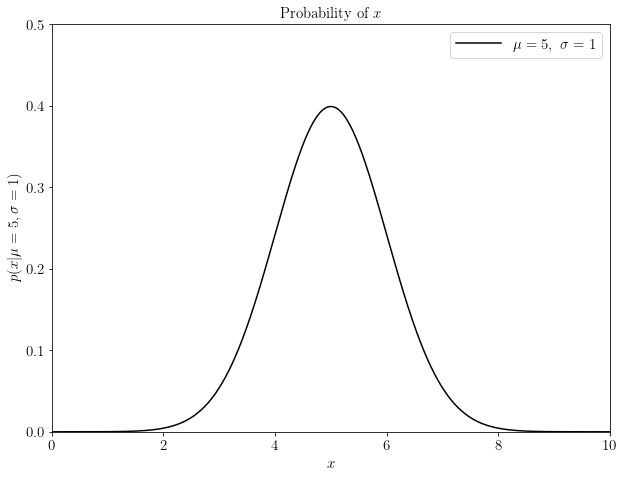

In [28]:
# Execute this cell
%matplotlib inline
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=15, usetex=True)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(10, 7.5))
dist = norm(5, 1)
x = np.linspace(0, 10, 1000)
plt.plot(x, dist.pdf(x), c='black',label=r'$\mu=5,\ \sigma=1$')

plt.xlim(0, 10)
plt.ylim(0, 0.5)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu=5,\sigma=1)$')
plt.title('Probability of $x$')

plt.legend()

### The Likelihood Function

If we want to know the total probability of our *entire* data set (as opposed to one measurement) then we must compute the *product* of all the individual probabilities:
$$L \equiv p(\{x_i\}|M(\theta)) = \prod_{i=1}^n p(x_i|M(\theta)),$$
where $M$ refers to the *model* and $\theta$ refers collectively to the $k$ parameters of the model, which can generally be multi-dimensional. In words, this is ***the probability of the data given the model parameters***. Note we're assuming the individual measurements are independent of each other.

If we consider $L$ as a function of the model parameters, we refer to it as the ***likelihood of the model parameters, given the observed data***. Note that while the components of $L$ may be normalized pdfs, their product is not.  Also the product can be very small, so we often take the log of $L$.

We can write this out as
$$L = \prod_{i=1}^n \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right),$$
and simplify to
$$L = \left( \prod_{i=1}^n \frac{1}{\sigma\sqrt{2\pi}} \right) \exp\left( -\frac{1}{2} \sum \left[\frac{-(x_i-\mu)}{\sigma} \right]^2 \right),$$

where we have written the product of the exponentials as the exponential of the sum of the arguments, which will make things easier to deal with later.

That is, we have done this: $$\prod_{i=1}^n A_i \exp(-B_i) = (A_iA_{i+1}\ldots A_n) \exp[-(B_i+B_{i+1}+\ldots+B_n)]$$

If recall the last lecture, then you might notice that the argument of the exponential is just

$$\exp \left(-\frac{\chi^2}{2}\right).$$

That is, for our gaussian distribution
$$\chi^2 = \sum_{i=1}^n \left ( \frac{x_i-\mu}{\sigma}\right)^2.$$

So, maximizing the likelihood is the same as minimizing $\chi^2$.

## The Core Idea Behind Maximum Likelihood Estimators

Let's say that we know that some data were drawn from a Gaussian distribution, but we don't know the $\theta = (\mu,\sigma)$ values of that distribution (i.e., the parameters).

Then Maximum Likelihood Estimation method tells us to think of the likelihood as a ***function of the unknown model parameters***, and ***find those that maximize the value of $L$***. Those will be our Maximum Likelihood Estimators for for the true values of the model.

Simple as that!

## MLE applied to a Homoscedastic Gaussian

Let's take a look at our astrometry example, using a model where all the measurements have the same error, drawn from a normal distribution, $N(0, \sigma)$.

All errors being the same is known as having **homoscedastic** errors.  Don't be intimidated by the word, statisticians just like to sound smart, so they say "homoscedastic" instead of "uniform errors".  Later we will consider the case where the measurements can have different errors ($\sigma_i$) which is called **heteroscedastic**.

We have an experiment with the set of measured positions $D=\{x_i\}$ in 1D with Gaussian errors, and therefore:

$$L \equiv p(\{x_i\}|\mu,\sigma) = \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right).$$

Note that that is $p(\{x_i\})$ not $p(x_i)$, that is the probability of the full data set, not just one measurement. If $\sigma$ is both constant and *known*, then this is a one parameter model with $k=1$ and $\theta_1=\mu$. 

For practical (and some theoretical) reasons, it's better to work with the natural logarithm of the likelihood.

We define the *log-likelihood function* as ${\rm lnL} = \ln[L(\theta)]$.  The maximum of this function happens at the same place as the maximum of $L$. Given all that, we have:

$${\rm lnL} = {\rm constant} - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma^2}.$$

Take a second and make sure that you understand how we got there.  It might help to remember that above, we wrote

$$L = \left( \prod_{i=1}^n \frac{1}{\sigma\sqrt{2\pi}} \right) \exp\left( -\frac{1}{2} \sum \left[\frac{-(x_i-\mu)}{\sigma} \right]^2 \right).$$

We then determine the maximum in the same way that we always do.  It is the parameter set for which the derivative of ${\rm lnL}$ is zero:

$$\frac{d\;{\rm lnL}(\mu)}{d\mu}\Biggr\rvert_{\hat \mu} \equiv 0.$$

That gives $$ \sum_{i=1}^N \frac{(x_i - \hat \mu)}{\sigma^2} = 0.$$

(note: we should also check that the $2^{\rm nd}$ derivative is negative, to ensure this is the *maximum* of $L$)

(also note: any constants in $\ln L$ disappear when differentiated, so constant terms can typically be ignored.)

Since $\sigma = {\rm constant}$, that says 
$$\sum_{i=1}^N x_i = \sum_{i=1}^N \hat \mu = N \hat \mu.$$

Thus we find that
$$\hat \mu = \frac{1}{N}\sum_{i=1}^N x_i,$$
which is just the arithmetic mean of all the measurements.

### The Sample Mean is an ML Estimator

The mean of observations drawn from a $N(\mu, \sigma=const)$ distribution is a maximum-likelihood estimator of the distribution's $\mu$ parameter.

We'd intuitively guess that (and we often do), but this derivation clarifies our choice: as an estimator of the real value of $\mu$, we adopt the value $\hat \mu$ with which it's maximally likely for the measured data set to occur.

It also exposes the ***assumptions*** behind this conclusion; namely homoscedasticity and gaussianity of errors. For example, if our errors were Cauchy-distributed, the mean of the sample won't be a good estimator (google for "Cauchy mean").

### Properties of ML Estimators

Assuming the data truly are drawn from the model, ML estimators have the following useful properties:

* **They are consistent estimators**; that is, they can be proven to converge to the true parameter value as the number of data points increases.
* **They are asymptotically normal estimators**. The distribution of the parameter estimate, as the number of data points increases to infinity, approaches a normal distribution, centered at the MLE, with a certain spread. This spread can often be easily calculated and used as a confidence band around the estimate, as discussed below (see eq. 4.7).
* **They asymptotically achieve the theoretical minimum possible variance, called the Cramér–Rao bound**. In other words, they achieve the best possible error given the data at hand; that is, no other estimator can do better in terms of efficiently using each data point to reduce the total error of the estimate (see eq. 3.33 in the textbook).

## Quantifying Estimate Uncertainty

Let's simulate 10 measurements ${x_i}$ drawn from a Gaussian with $\mu = 5$ and $\sigma = 1$, and compute the ML estimator for $\mu$.

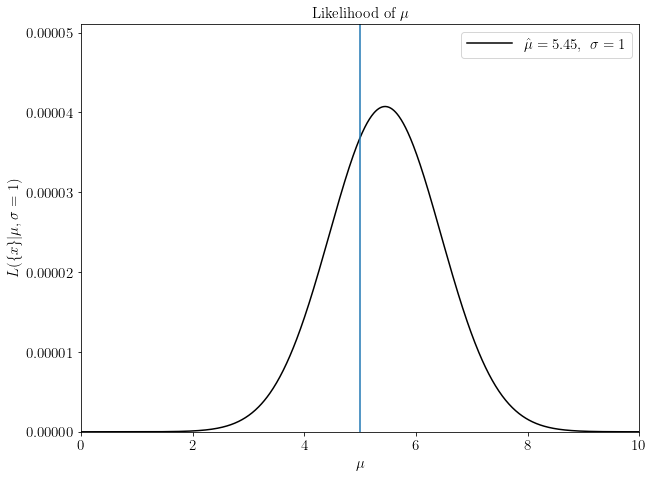

In [29]:
# Execute this cell
%matplotlib inline
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=15, usetex=True)

#------------------------------------------------------------
np.random.seed(seed=42)
Nsamples=10
measurements = np.random.normal(5, 1, Nsamples)
mu = np.average(measurements)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(10, 7.5))
dist = norm(mu, 1)
C = (1./(2.*np.pi))**(10./2.)
x = np.linspace(0, 10, 1000)
plt.plot(x, C* dist.pdf(x), c='black',label=r'$\hat\mu=%.2f,\ \sigma=1$' % mu)
#plt.plot([159.9,160.1],[0,0.8], ls=ls, color='k', label=r'%s $\mu=%i' % (lab, mu))
plt.axvline(x=5)

plt.xlim(0, 10)
plt.ylim(0, 0.5*C)

plt.xlabel('$\mu$')
plt.ylabel(r'$L(\{x\}|\mu,\sigma=1)$')
plt.title('Likelihood of $\mu$')

plt.legend()

## Quantifying Estimate Uncertainty

As you've seen on in the previous plot, our ML estimate of $\mu$ is not perfect. The uncertaintly of the estimate is captured by the likelihood function (and we'll get back to this next week, in the Bayesian contect), but we'd like to quantify it with a few numbers.

We *define* the uncertainty on our MLEs as second (partial) derivatives of log-likelihood:

$$\sigma_{jk} = \left( - \frac{d^2}{d\theta_j} \frac{\ln L}{d\theta_k} \Biggr\rvert_{\theta=\hat \theta}\right)^{-1/2}.$$

Taken together, these entries (more accurately, their squares) are know as the *covariance matrix*.

The marginal error bars for each parameter, $\theta_i$ are given by the diagonal elements, $\sigma_{ii}$. These are the "error bars" that are typically quoted with each measurement.

In our example, the uncertainly on the mean is 
$$\sigma_{\mu} = \left( - \frac{d^2\ln L(\mu)}{d\mu^2}\Biggr\rvert_{\hat \mu}\right)^{-1/2}$$

We find
$$\frac{d^2\ln L(\mu)}{d\mu^2}\Biggr\rvert_{\hat \mu} = - \sum_{i=1}^N\frac{1}{\sigma^2} = -\frac{N}{\sigma^2},$$
since, again, $\sigma = {\rm constant}$.  

Then $$\sigma_{\mu} = \frac{\sigma}{\sqrt{N}}.$$

So, our estimator of $\mu$ is $\overline{x}\pm\frac{\sigma}{\sqrt{N}}$, which is a result that you should be familiar with.

### What is $\pm \sigma$? Errors as Gaussian Approximations to the Likelihood Function

The result for $\sigma_{\mu}$ has been derived by expanding $\ln L$ in a Taylor series and retaining terms up to second order (essentially, $\ln L$ is approximated by a parabola, or an ellipsoidal surface in multidimensional cases, around its maximum). If this expansion is exact (as is the case for a Gaussian error distribution), then we've completely captured the error information.

In general, this is not the case and the likelihood surface can significantly deviate from a smooth elliptical surface. Furthermore, it often happens in practice that the likelihood surface is multimodal. It is always a good idea to visualize the likelihood surface when in doubt (see examples in §5.6 in the textbook).

### What is $\pm \sigma$? Errors as Gaussian Approximations to the Likelihood Function

The $(\hat \mu - \sigma_\mu, \hat \mu + \sigma_\mu)$ range gives us a **confidence interval**.

In frequentist interptetation, if we repeated the same measurement a hundred times, we'd find for 68 experiments the true value was within their computed confidence intervals ($1 \sigma$ errors).

### MLE applied to a Heteroscedastic Gaussian

Now let's look a case where the errors are heteroscedastic.  For example if we are measuring the length of a rod and have $N$ measurements, $\{x_i\}$, where the error for each measurement, $\sigma_i$ is known.  Since $\sigma$ is not a constant, then following the above, we have

$$\ln L = {\rm constant} - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma_i^2}.$$

Taking the derivative:
$$\frac{d\;{\rm lnL}(\mu)}{d\mu}\Biggr\rvert_{\hat \mu} = \sum_{i=1}^N \frac{(x_i - \hat \mu)}{\sigma_i^2} = 0,$$
then simplifying:

$$\sum_{i=1}^N \frac{x_i}{\sigma_i^2} = \sum_{i=1}^N \frac{\hat \mu}{\sigma_i^2},$$

yields a MLE solution of 
$$\hat \mu = \frac{\sum_i^N (x_i/\sigma_i^2)}{\sum_i^N (1/\sigma_i^2)},$$

with uncertainty
$$\sigma_{\mu} = \left( \sum_{i=1}^N \frac{1}{\sigma_i^2}\right)^{-1/2}.$$




## Goodness of Fit

The MLE approach tells us what the "best" model parameters are, but not how good the fit actually is.  If the model is wrong, "best" might not be particularly revealing!  For example, if you have $N$ points drawn from a linear distribution, you can always fit the data perfectly with an $N-1$ order polynomial.  But that won't necessarily perfectly predict future measurements.

We can describe the **goodness of fit** in words simply as whether or not it is likely to have obtained $\ln L_0$ by randomly drawing from the data.  That means that we need to know the *distribution* of $\ln L$.  

## Goodness of Fit

For the Gaussian case we have just described, we can write

$$z_i = (x_i-\mu)/\sigma,$$ then
$$\ln L = {\rm constant} - \frac{1}{2}\sum_{i=1}^N z^2 = {\rm constant} - \frac{1}{2}\chi^2.$$

Here, $\chi^2$ is the same thing that you may already be familar with and whose distribution we discussed last week. So **$\ln L$ is distributed as $\chi^2$ (with $N-k$ degrees of freedom).**

## Goodness of Fit

What does that tell us?

The expectation value for the $\chi^2$ distribution is $N − k$ and its standard deviation is $\sqrt{2(N − k)}$. We typically have $N \gg k$ (where $N$ is the number of data points, and $k$ is the number of parameters in the model). When that holds, it becomes useful to define **$\chi^2$ per degree of freedom, $\chi^2_{dof}$**, as:

$$\chi^2_{dof} = \frac{1}{N-k}\sum_{i=1}^N z^2_i.$$

Therefore, for a good fit we would expect that $\chi^2_{dof}\approx 1$ (the expectation value).  If $\chi^2_{dof}$ is significantly larger than 1 (how much larger?), then it is likely that we are not using the correct model.

We can also get overly high or low values of $\chi^2_{dof}$ if our errors are under- or over-estimated.

## Goodness of Fit: An Example

![Ivezic, Figure 4.1](http://www.astroml.org/_images/fig_chi2_eval_1.png)


## Summary

So far we heard about:

* Classical vs. Bayesian Inference (more next week)
* Likelihood function
* Maximum Likelihood Estimation
  * Homoscedastic Samples
  * Heteroscedastic Samples
* Assessing the goodness of Fit

### Truncated/Censored Data and Other Cost Functions

Note that dealing with missing data points ("censored data") adds complications that we don't have time to get into here, but see Textbook 4.2.7  Also maximum likelihood is just one possible "cost function", see Textbook, 4.2.8. 

## Least Squares as Maximum Likelihood

![alt text](figures/multiple-linear-regression-11-638.jpg)

Credit: https://www.slideshare.net/jtneill/multiple-linear-regression

Statement of the problem:

* We've collected a set of $N$ data points $x_i, y_i$.
* Our model for their behavior is $y(x) = a x + b$, where $a$ and $b$ are unknowns.
* We wish to find the "best" $a$ and $b$ that describe the measured data

Solution:
* What does "good" (or "best") mean? Intuitively, a good fit is one where the line "passes through the points" (or comes as close as possible to them). In other words, where the *residuals*, $r_i = y_i - y(x_i)$, are small.
* Hmm, but minimizing the residual for one point may be in tension with the residuals of other points. How do we find the right balance?
* Least squares wisdom: the path to balance lies in minimizing the ***sum of the squares of the residuals***

$$ {min}_{a, b} \, Q(a, b) = {min}_{a, b} \sum_{i=1}^N (y_i - y(x_i))^2 $$

## Finding the minimum

$$ \frac{\partial Q}{\partial a} = 0; \;\;{\rm solve\,for\,a} $$
$$ \frac{\partial Q}{\partial b} = 0; \;\;{\rm solve\,for\,b} $$

Let's start solving:

$$
\frac{\partial Q}{\partial a} = \sum_{i=1}^N \frac{\partial}{\partial a}(y_i - (a x_i + b))^2 = 
\sum_{i=1}^N (y_i - (a x_i + b)) (- x_i) = 0
$$

$$
\frac{\partial Q}{\partial b} = \sum_{i=1}^N \frac{\partial}{\partial b}(y_i - (a x_i + b))^2 = 
\sum_{i=1}^N (y_i - (a x_i + b)) (- 1) = 0
$$

This gives us two coupled linear equations for $a, b$. After some straightforward but tedious math, we recover the well known result:

$$ a = \frac{\sum_{i=1}^N (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^N (x_i - \bar{x})^2} $$

and

$$ b = \bar{y} - a \bar{x} $$

## Problems

Least squares method, as introduced above, has some problems:
* Why east *squares*? Why not ${residuals}^4$? Or least absolute value? It's not clear that the choice of squares is well motivated.
* What happens when we have error bars known for every datum $y_i$? We know the prescriptive answer is to divide the residual by the error, but where does that come from?
* And what would we do if we had error bars specified for both $x$ *and* $y$?

## Fitting a Line using a Maximum Likelihood Estimator

We can motivate the least squares method from ML perspective.

Assume the scatter in our measurements (the residuals) is generated by a gaussian process. I.e.:

$$ y_i = a x_i + b + r_i $$

where $r_i$ is drawn from $N(0, \sigma)$. Here, $\sigma$ is the error the measurement induces.

Let us compute the likelihood. First, we ask ourselves what is the probability $p(y_i|x_i, M(a, b), \sigma)$ that a particular point $y_i$ would be measured. It is just the normal distribution:

$$ p(y_i|x_i, M(a, b), \sigma) = N(y_i - y(x)|\sigma) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( - \frac{(y_i - y(x_i))^2}{2 \sigma^2} \right) $$.

Assuming the measurements are independent, the likelihood is then the product of individual probabilities for every $y_i$:

$$ L(a, b) = \prod_{i=1}^N \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( - \frac{(y_i - y(x_i))^2}{2 \sigma^2} \right) $$.

and $\ln L$ is equal to:

$$ \ln L(a, b) = constant - \frac{1}{2 \sigma^2} \sum_{i=1}^N (y_i - y(x_i))^2 $$.

This is the expression that we now minimize with respect to $a$ and $b$ to find ML estimators for those parameters. But it's also the same expression we've derived using the least-squares prescription! (up to a constant and a factor that don't change anything.)

## Least squares as a Maximum Likelihood estimator

This shows that LSQ is an MLE of a model with gaussian errors. It gives us a better understanding of its applicability and properties (i.e., all the nice properties of ML estimators apply). Now it's also straightforward to see how to generalize it to the heteroscedastic case.

More generally, note that I didn't have to use the fact we were using LSQ to fit a line to show that it's an ML estimator (i.e., I just specified $y(x_i)$; this function could have been anything). Therefore, more broadly, for an arbitrary model y_i(x) whose errors are gaussian, it will be the case that log-likelihood is:

$$ \ln L(a, b) = constant - \sum_{i=1}^N \frac{(y_i - M(x_i; \theta))^2}{2 \sigma^2} $$.

where $\theta$ are its parameters (one or more). We'll use this soon to compute an ML estimator for the flux of a star.

## ML in action: Optimal Photometry

We now turn to examples of applications of ML in astronomy. We'll look at two cases: simple photometry and simultaneous fitting of galaxy size and total flux.

### Some useful definitions and functions

In [30]:
%matplotlib inline

This astroML function adjusts matplotlib settings for a uniform feel in the 
textbook. Note that with `usetex=True`, fonts are rendered with $\LaTeX$. This 
may result in an error if $\LaTeX$ is not installed on your system.  In that 
case, you can set usetex to `False`.

In [31]:
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=15, usetex=True)

In [32]:
import numpy as np
import math
import matplotlib.pyplot as plt
from astroML.plotting.mcmc import convert_to_stdev

Let's define a few more useful functions:

In [33]:
def plotCutout(img, title = None, clabel='$counts$', xlabel='x (pixels)', ylabel='y (pixels)', loc=None, fig=None):
    """Make a nice looking plot of a small image"""
    if loc is None:
        fig, ax = plt.subplots(figsize=(8,8))
        fig.subplots_adjust(right=0.8, bottom=0.34)
    else:
        ax = fig.add_subplot(loc)

    # coordinate of the edge (assuming a square image)
    xe = img.shape[0] / 2.

    if title is None:
        title = "min = %.0f, max=%.0f" % (img.min(), img.max())
    
    ax.set_title(title, fontsize=14)
    plt.imshow(img, origin='lower', interpolation='nearest',
           extent=(-xe, xe, -xe, xe),
           cmap=plt.cm.binary, aspect='auto')
    plt.clim(-20, 100)
    plt.colorbar().set_label(clabel)

    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)

## How does an astronomical image come to be?

![Core of Draco Dwarf Galaxy](figures/Draco-2x2.jpg)

Credit: Robert Lupton and the SDSS Collaboration

## A star, imaged in space, through a perfect telescope

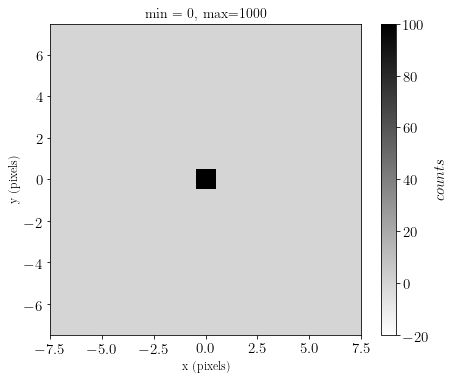

In [34]:
Atrue = 1000.0    # the source count normalization
xdim = 15         # width of the image
ydim = 15         # height of the image
muXtrue = 0.0     # source x centroid 
muYtrue = 0.0     # source y centroid 

image = np.zeros((xdim, ydim))
image[7,7] = Atrue

plotCutout(image)

## Actually, photons are quantized...

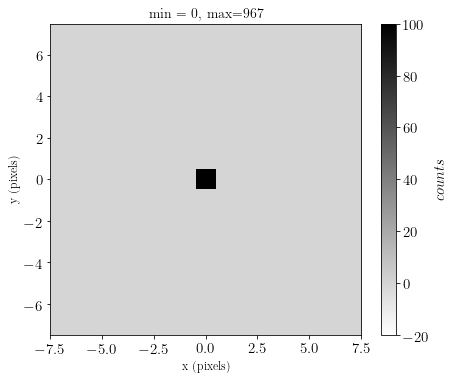

In [35]:
Atrue = 1000.0    # the source count normalization
xdim = 15         # width of the image
ydim = 15         # height of the image
muXtrue = 0.0     # source x centroid 
muYtrue = 0.0     # source y centroid 

image = np.zeros((xdim, ydim))
image[7,7] = np.random.poisson(Atrue)

plotCutout(image)

## If we take many measurements

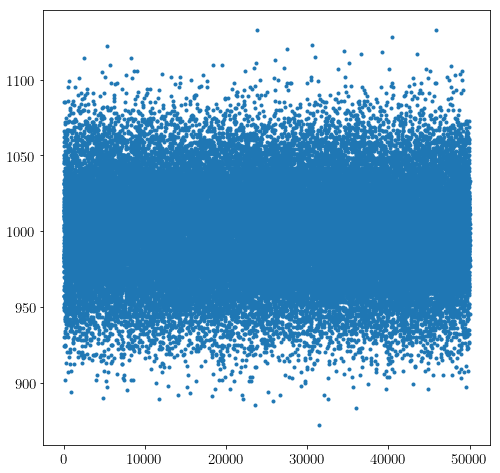

In [36]:
meas = np.random.poisson(Atrue, 50000)
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(meas, '.')

## Or, as a histogram

/scratch/darko/devel/new_oct18/lsstsw/miniconda/envs/lsst-scipipe/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
/scratch/darko/devel/new_oct18/lsstsw/miniconda/envs/lsst-scipipe/lib/python3.6/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  


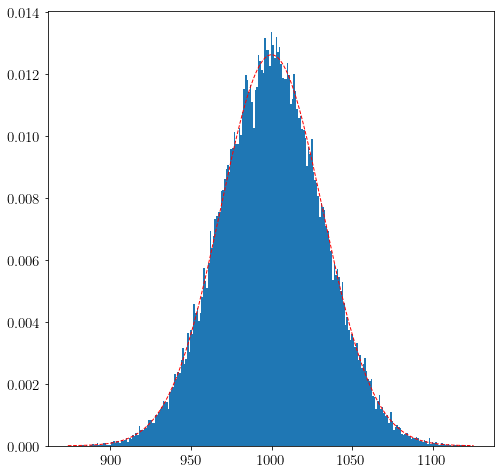

In [37]:
nsigma = np.floor(4*np.sqrt(Atrue))
bins = np.linspace(Atrue - nsigma, Atrue + nsigma, 2*nsigma+1)-0.5
fig, ax = plt.subplots(figsize=(8,8))
n, bins, patches = ax.hist(meas, bins, normed=True)

import matplotlib.mlab as mlab
y = mlab.normpdf(bins, Atrue, np.sqrt(Atrue))
ax.plot(bins, y, 'r--', linewidth=1)

So we can safely approximate Poisson noise with Gaussian noise for large N, and use the Gaussian as our model for the "measurement error". That brings us into the "least squares" regime of ML.

We'll soon make use of that observation.

## Atmosphere makes things more difficult

And the telescope, and the detector...

As the light travels through the atmosphere, it becomes scattered away from the single pixel it would ideally occupy. Instead of ending in a single ***point***, it ***spreads*** to a (hopefully small) spot on the detector.

![Snapshot from PhoSim simulation movie](figures/phosim-snapshot.jpg)

Credit: John Peterson and the PhoSim team.


## The Point Spread Function

How the light spread out is characterized by the **Point Spread Function** (the "PSF"). There are various contributions to the PSF, from minute misalignments in the optics, to the atmosphere, to diffusion of the electrons as they travel through the silicon in the CCD. But the dominant effect is the one ***from the atmosphere***.

![PSF Formation](figures/psf-formation.jpg)

## The Point Spread Function

In practice, we don't construct the PSF from *ab initio* considerations; instead, we measure it by looking at the observed shape of bright, isolated, point sources (i.e., stars). Those observations are noisy, so we fit analytical profiles to estimate the true PSF.

Which profiles to fit? A good description of the point spread function is the Moffat profile:

$$ I = I_0 \left[ 1 + \left( \frac{r}{\alpha} \right)^2 \right]^{-\beta} $$

where $r$ is the radius from the center of the object, $\alpha$ sets the overall size of the PSF spot, and $\beta$ controls the shape. This profile can be mathematically tedious to work with, so frequently a sum of Gaussians is used.

For simplicity, we will use just a single Gaussian here.

## The star imaged from the ground

Because of the smearing, our star will look like a PSF on the detector (the CCD).

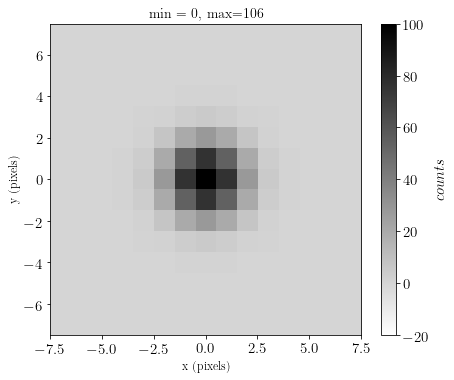

In [38]:
Atrue = 1000.0    # the source count normalization
xdim = 15         # width of the image
ydim = 15         # height of the image
muXtrue = 0.0     # source x centroid 
muYtrue = 0.0     # source y centroid
sigmaPSF = 1.5    # in pixels, corresponds to seeing = 1.5*0.2*2.355 = 0.7 arcsec for LSST (0.2" pix)

def makePSF(shape, x0, y0, sigmaPSF):
    # Add a (Gaussian) PSF of width sigmaPSF, centered on (x0, y0)
    xx = np.arange(shape[0]) - shape[0]/2.+0.5
    yy = np.arange(shape[1]) - shape[1]/2.+0.5
    
    r = np.sqrt((xx[:, None]-x0)**2 + (yy[None, :]-y0)**2)
    psf = np.exp(-r**2./2./sigmaPSF) / (2*math.pi*sigmaPSF)
    return psf

image = np.zeros((xdim, ydim))
image = Atrue * makePSF(image.shape, 0, 0, sigmaPSF)

plotCutout(image)

## The atmosphere also adds the background

Photons scatter in the atmosphere, both from the sky (e.g., moonlight) but also from the ground. This adds some (quite annoying) background to our image of the sky.

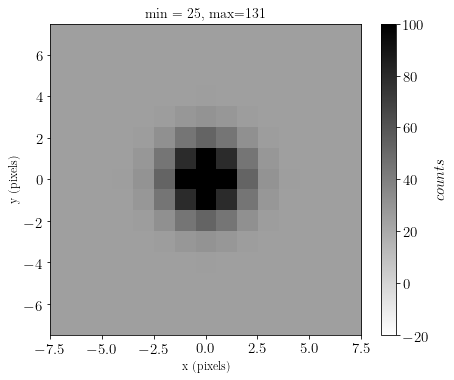

In [39]:
Atrue = 1000.0    # the source count normalization
xdim = 15         # width of the image
ydim = 15         # height of the image
muXtrue = 0.0     # source x centroid |
muYtrue = 0.0     # source y centroid
sigmaPSF = 1.5    # in pixels, corresponds to seeing = 1.5*0.2*2.355 = 0.7 arcsec for LSST (0.2" pix)
skyBg = 25        # sky background

image = np.zeros((xdim, ydim))
image = Atrue * makePSF(image.shape, 0, 0, sigmaPSF)
image += skyBg

plotCutout(image)
noiselessImage = image    # save it for later

## And let's not forget about the photon noise!

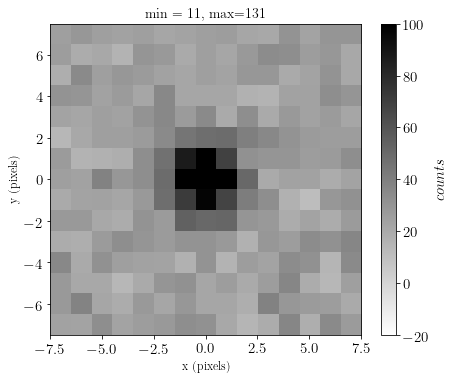

In [40]:
Atrue = 1000.0    # the source count normalization
xdim = 15         # width of the image
ydim = 15         # height of the image
muXtrue = 0.0     # source x centroid 
muYtrue = 0.0     # source y centroid
sigmaPSF = 1.5    # in pixels, corresponds to seeing = 1.5*0.2*2.355 = 0.7 arcsec for LSST (0.2" pix)
skyBg = 25        # sky background

image = np.zeros((xdim, ydim))
image = Atrue * makePSF(image.shape, 0, 0, sigmaPSF)
image += skyBg
image = np.random.poisson(image)

plotCutout(image)
simulatedImage = image    # save it for later

## Congratulations!

We've just built a rudimentary simulator of astronomical images!

You can imagine how one could generalize it further (multiple objects, more complex objects, more complex PSFs, background that varies as a function of position, ...)

## Photometry (measuring the flux)

We now have an image that we observe, and some ***understanding of the processes that created it***. The latter is crucial as we will eventually construct a ***model*** of this process for the ML estimate.

Now we wish to estimate the flux. How should we do that?

## Step #1: Estimate and remove the sky value

Question: how would you estimate the sky value?

For our present purposes, I'll just assume I know it somehow.

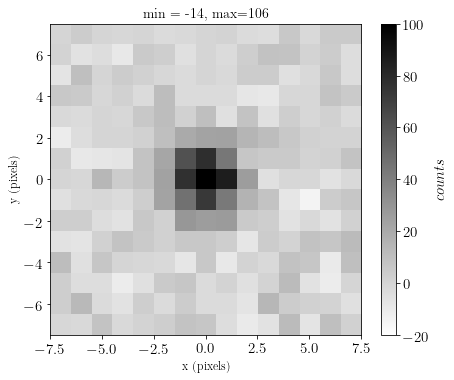

In [41]:
# First, subtract the sky background (assume we've estimated it (how?))
image = simulatedImage - skyBg

plotCutout(image)

## Aperture Photometry

Before coming up with a more advanced technique, we'll try something simple to estimate the flux.

Idea: pixels are "photon buckets"; let's count up how many photons they caught. We'll sum up the flux in some circular aperture around the source, and use that as an ***estimator*** of the total flux in the source.

A_ap(r=3) = 934.0


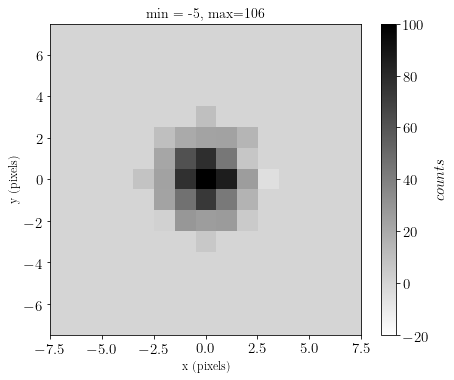

In [42]:
# Aperture photometry

def apPhot(image, r = 3, x0=0, y0=0):
    xx = np.arange(image.shape[0]) - image.shape[0]/2.+0.5
    yy = np.arange(image.shape[1]) - image.shape[1]/2.+0.5
    
    rpix = np.sqrt((xx[:, None]-x0)**2 + (yy[None, :]-y0)**2)
    apPhotImage = image[:]
    apPhotImage[rpix > r] = 0

    return apPhotImage.sum(), apPhotImage

image = simulatedImage - skyBg

r = 3
count, apPhotImage = apPhot(image, r)

print('A_ap(r=%.0f) = %.1f' % (r, count))
plotCutout(apPhotImage)

## How well does aperture photometry do?

Let's turn off the noise for a second...

A_ap(r=3) = 950.9


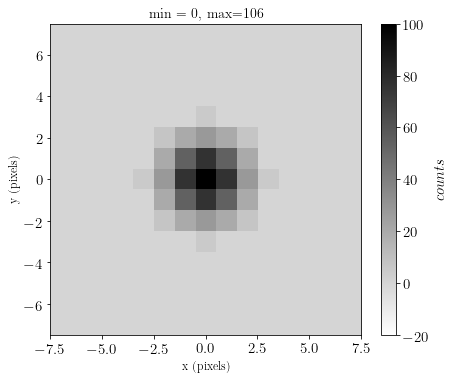

In [43]:
image = noiselessImage - skyBg

r = 3
count, apPhotImage = apPhot(image, r)

print('A_ap(r=%.0f) = %.1f' % (r, count))
plotCutout(apPhotImage)

## (Uncalibrated/Uncorrected) Aperture Photometry would introduce bias

This is a biased estimator. The result will asymptote to a value lower than the true value (there's flux we miss in the outskirts of the object).

In real-life usage, we would calibrate this out by performing *aperture correction*, or consistently using the same aperture for both calibration stars and stars of interest (under the assumption that the PSF is constant!).

## PSF Photometry

Let us try to derive a better estimator of the object flux.

## Maximum Likelihood estimation of the flux

Let's denote the total flux of the star as $A$. As we discussed above when we looked at how an astronomical image gets formed, our model is that the total flux $A$ gets spread out from the single central pixel into many (formally, infinitely many) surrounding pixels in the shape of the PSF.

So our **model** for the image is that it consists of the flux $A$ spread around in the shape of the PSF, plus the background (which we've removed), plus the Gaussian noise (caused by photon quantization).

So, <u>once the background is removed</u>, for ***each pixel*** I can write:

$$ I(x,y) = A * PSF(x - x_0, y - y_0) + r_i $$

where $r_i$ is drawn from a Gaussian with

$$N(0, \sigma_{x,y} = \sqrt{I_{x,y} + B})$$

and $B$ is the sky background. It's critical not to forget the background when computing the sigma -- for faint sources, this is where most of the measurement uncertainty comes from!

## Maximum Likelihood estimation of the flux

Note this is practically identical to our case with fitting a line, except that instead of having one index $i$, we have two indices for the data points, $(x, y)$. And ***each pixel*** is an independent data point that constrains our model.

So we can readily write out the log-likelihood as:

$$ \ln L(A) = constant - \sum_{x,y} \frac{(I_{x,y} - A \cdot PSF(x - x_0, y - y_0, \sigma_{PSF}))^2}{2 \sigma_{x,y}^2} $$.

The best way to think of this expression is as:

$$ \ln L(A) = constant - \sum_{data} \frac{(data - model)^2}{2 \cdot variance} $$.

where $data$, $model$, and $variance$ are implicitly summed over whichever indices exist in the problem (e.g., $x,y$ coordinates in images, or the $i$ index in fitting a line).

As we've seen last week, maximizing the likelihood of a product of normal distribution reduces to minimizing the $\chi^2$, which is what we'll do next.

## Let's see what happens for the true value of $A$

chi^2/dof = 1.28, stdev = 0.094


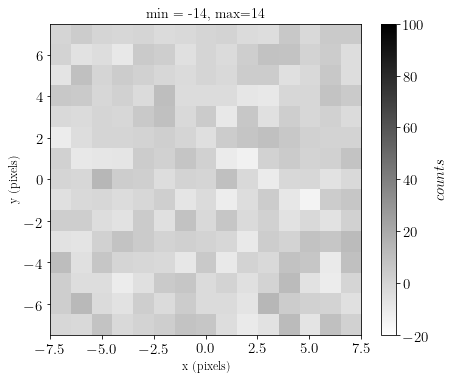

In [44]:
image = np.copy(simulatedImage)

# Estimate the noise in the image
sigmaNoise = np.sqrt(image)

# Subtract the background (we assume we've estimated it somehow)
image -= skyBg

# Subtract the correct model
psf = makePSF(image.shape, 0, 0, sigmaPSF)
model = Atrue*psf
chi2 = np.sum(((image-model)/sigmaNoise)**2)
print("chi^2/dof = %.2f, stdev = %.3f" % (chi2 / (image.size - 1), np.sqrt(2. / (image.size - 1))))

plotCutout(image-model)

which *looks* reasonable. Let's examine it some more.

## Perfect measurement (no photon or other noise)

chi^2/dof = 0.00, stdev = 0.094


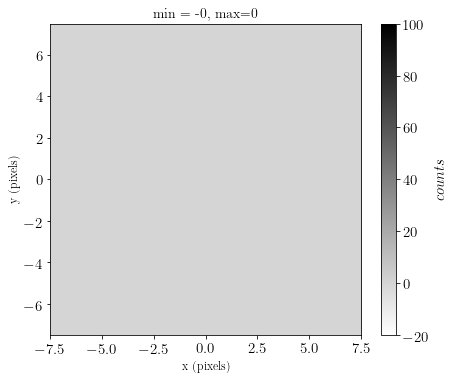

In [45]:
image = np.copy(noiselessImage)

# Estimate the noise in the image
sigmaNoise = np.sqrt(image)

# Subtract the background (we assume we've estimated it somehow)
image -= skyBg

# Subtract the correct model
psf = makePSF(image.shape, 0, 0, sigmaPSF)
model = Atrue*psf
chi2 = np.sum(((image-model)/sigmaNoise)**2)
print("chi^2/dof = %.2f, stdev = %.3f" % (chi2 / (image.size - 1), np.sqrt(2. / (image.size - 1))))

plotCutout(image-model)

This is not surprising: we've generated the original image by multiplying the true flux with the PSF. Here, we're subtracting exactly the same thing, and the result must be identically zero.

## A more interesting case: estimating the true flux

To estimate the true flux, we need to maximize the likelihood. That is equivalent to minimizing the $\chi^2$.

Let's try it first without the noise.

A_ML = 1000.0 with chi^2/dof = 0.00


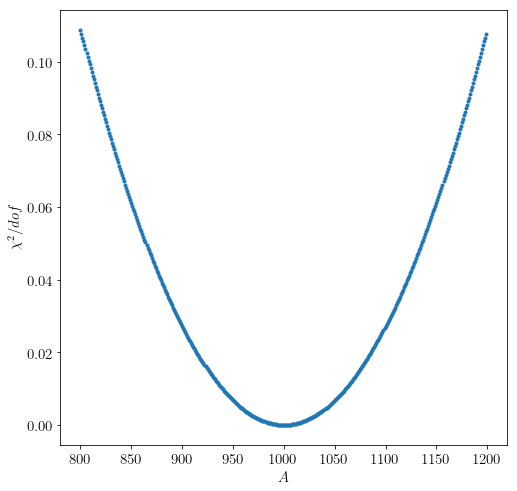

In [46]:
def psfPhot(image, Amin, Amax):
    """ Perform PSF photometry with a PSF=N(x=0,y=0,\sigma=sigmaNoise)"""
    # Estimate the noise in the image
    sigmaNoise = np.sqrt(image)

    # Subtract the background (we assume we've estimated it somehow)
    image = image - skyBg

    testA = np.arange(Amin, Amax)
    chi2dof = np.empty(testA.shape)
    best = (np.nan, np.inf)
    psf = makePSF(image.shape, 0, 0, sigmaPSF)
    for i, A in enumerate(testA):
        model = A*psf
        chi2 = np.sum(((image-model)/sigmaNoise)**2)
        chi2dof[i] = chi2 / (image.size - 1)
        if chi2dof[i] < best[1]:
            best = (A, chi2dof[i])
    return best, testA, chi2dof

image = noiselessImage

((bestA, bestChi2dof), testA, chi2dof) = psfPhot(image, Atrue - 200, Atrue + 200)
print("A_ML = %.1f with chi^2/dof = %.2f" % (bestA, bestChi2dof))

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(testA, chi2dof, '.')
ax.set_xlabel(r"$A$")
ax.set_ylabel(r"$\chi^2/dof$");

Excellent! Our estimator is unbiased.

## Let's add back the noise

A_ML = 964.0 with chi^2/dof = 1.28


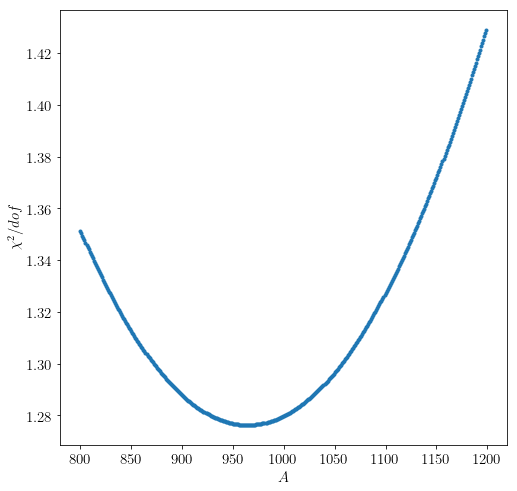

In [47]:
image = simulatedImage

((bestA, bestChi2dof), testA, chi2dof) = psfPhot(image, Atrue - 200, Atrue + 200)
print("A_ML = %.1f with chi^2/dof = %.2f" % (bestA, bestChi2dof))

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(testA, chi2dof, '.')
ax.set_xlabel(r"$A$")
ax.set_ylabel(r"$\chi^2/dof$");

## And we can also plot the likelihood instead

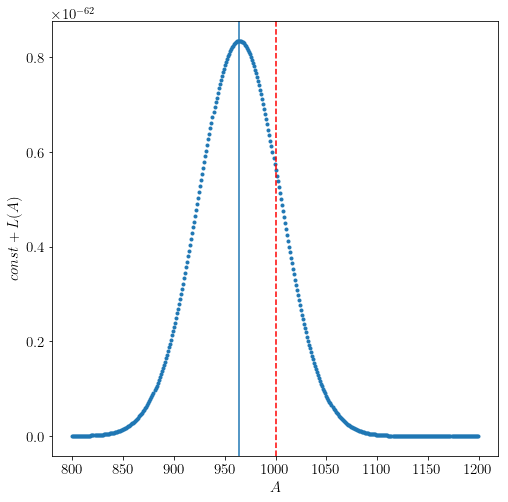

In [48]:
lnL = np.exp(-0.5*(chi2dof*(image.size-1)))

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(testA, lnL, '.')
ax.set_xlabel(r"$A$")
ax.set_ylabel(r"$const + L(A)$")

ax.axvline(x=bestA)
ax.axvline(x=Atrue, color='red', linestyle='--')

## Models with more parameters

The example above is a bit contrived; we've numerically solved (brute forced!) a problem for which an analytic solution exists (e.g., we could've just solved $\partial \ln L / \partial A = 0$ for $A$; see http://ls.st/lse-40 for the solution).

It has the benefit of being general, however. We can apply the same technique to models with more parameters (within the limits of computing power available to us!). The other parameters could be the position of the object ($x$, $y$), or some measure of the shape of the object.

As the number of parameters increases, the likelihood curve from the previous slide becomes the ***likelihood (hyper)surface***. The more dimensions there are, the more difficult (computationally expensive) it becomes to find its maximum using brute force solutions; even for 2D cases, we're likely to resort to ***minimization algorithms*** (e.g., Levenberg–Marquardt or others).

## Example: Measuring the size and brightness of a spherical, gaussian, galaxy

Let's explore a two-dimensional case.

Imagine that, instead of a star, we're observing a galaxy. Even in the ideal (space) case, the Galaxy will not be a point source. We'll imagine we're dealing with a "Gaussian spherical galaxy" -- i.e., one whose intensity of ligtht falls of as a 2D gaussian would. As with the star, we'll asume the position of the galaxy is known.

Our model has two parameters: the measure of the extendedness of the galaxy -- $\sigma$ -- and its total flux, $C$:

$$ I(x, y) = \frac{C}{2 \pi \sigma^2} \exp \left( -\frac{(x-x_0)^2 + (y-y_0)^2}{2\sigma^2} \right) $$

Our code will now have to explore the likelihood surface in $(C, \sigma)$ space, and find the point of its maximum.

Note #1: $C$ here is the same as $A$ previously -- the total flux of the object. We use $C$ for the galaxy to be closer to the nomenclature of http://ls.st/lse-40.

Note #2: When generating the simulated image, $I(x, y)$ needs to be ***convolved*** with the PSF. Fortunately (actually, on purpose!) we've chosen the galaxy profile to be gaussian, and the convolution of two gaussians with variances $\sigma_1^2$ and $\sigma_2^2$ is also a gaussian with the variance $\sigma_1^2 + \sigma_2^2$ (i.e., it's wider). Our function `gauss2D` utilizes this fact to generate the convolved image of the galaxy.

## Helper functions

Plotting functions

In [49]:
def FourPanelPlot(nonoise, psf, image, diffimage):
    """
        Make a 4-panel plot of the noiseless image, the psf, the image with noise, and the difference.
    """
    ## nonoise -- noiseless image, N x N array
    ## psf -- the image of the PSF, N x N array
    ## image -- image with the added noise, N x N array
    ## diffimage -- difference image (image - psf)

    fig = plt.figure(figsize=(8, 8))
    fig.subplots_adjust(left=0.13, bottom=0.15, right=0.95, top=0.90, wspace=0.18, hspace=0.46)

    images = [
        (221, nonoise, "noiseless image",  ['',          r' ',          r'y (pixels)']),
        (223, psf,     "psf image",        ['',          r'x (pixels)', r'y (pixels)']),
        (222, image,   "image with noise", [r'$counts$', r' ',          r'']),
        (224, diffimage, "image - psf",    [r'$counts$', r'x (pixels)', r''])
    ]

    for (loc, img, title, (clabel, xlabel, ylabel)) in images:
        plotCutout(img, title, clabel, xlabel, ylabel, loc, fig)

    #plt.savefig('4panels.png')

def plotLikelihood(chiPixSig, chiPixCmod, lnL, sigtrue, sigmaML, CmodML):

    fig = plt.figure(figsize=(8, 8))
    fig.subplots_adjust(left=0.08, bottom=0.15, right=0.95, top=0.90, wspace=0.29, hspace=0.46)

    ## renormalize and truncate for clean plotting
    lnL -= lnL.max()
    lnL[lnL < -6] = -6
    lnL[np.isnan(lnL)] = -6

    ## lnL image 
    ax = fig.add_axes([0.35, 0.35, 0.45, 0.6], xticks=[], yticks=[])
    ax.set_title('ln(L) image', fontsize=14)
    # pretty color map
    plt.imshow(lnL, origin='lower', extent=(chiPixSig[0], chiPixSig[-1], chiPixCmod[0], \
                                            chiPixCmod[-1]), cmap=plt.cm.RdYlGn, aspect='auto')

    # colorbar
    cax = plt.axes([0.82, 0.35, 0.02, 0.6])
    cb = plt.colorbar(cax=cax)
    cb.set_label(r'$lnL(\sigma, C_{mod})$', fontsize=14)
    plt.clim(np.min(lnL), np.max(lnL))

    # contours
    # plt.contour(chiPixSig, chiPixCmod, convert_to_stdev(lnL), levels=(0.683, 0.955, 0.997), colors='w')

    # mark true values     
    ax.plot(sigtrue, 1000.0, 'o', color='red', alpha=0.75)
    # mark ML solution: (sigmaML, CmodML)
    ax.plot(sigmaML, CmodML, 'x', color='white', alpha=0.99, lw=35)

    # marginal projections
    p_sigma = np.exp(lnL).sum(0)
    p_Cmod = np.exp(lnL).sum(1)
  
    ax1 = fig.add_axes([0.35, 0.1, 0.45, 0.23], yticks=[])
    ax1.plot(chiPixSig, p_sigma, '-k')
    ax1.set_xlabel(r'$\sigma$ (pixel)', fontsize=12)
    ax1.set_ylabel(r'$p(\sigma)$', fontsize=12)
    ax1.set_xlim(np.min(chiPixSig), np.max(chiPixSig))

    ax2 = fig.add_axes([0.15, 0.35, 0.18, 0.6], xticks=[])
    ax2.plot(p_Cmod, chiPixCmod, '-k')
    ax2.set_ylabel(r'$C_{mod}$ (counts)', fontsize=12)
    ax2.set_xlabel(r'$p(C_{mod})$', fontsize=12)
    ax2.set_xlim(ax2.get_xlim()[::-1])  # reverse x axis
    ax2.set_ylim(np.min(chiPixCmod), np.max(chiPixCmod))

Functions that simulate the image, and compute the likelihood surfaces

In [50]:
### computations 
def gauss2D(muX, muY, sig, A, skyBg, sigPSF, Xpixels, Ypixels):
    """
    Generate an image of size (Xpixels, Ypixels) with
    a 2D circular Gaussian of total flux A
    with standard deviation sigma^2=sig^2 + sigPSF^2
    superimposed on a uniform background B and centered
    on (muX, muY).
    """
    r = np.sqrt((Xpixels-muX)**2 + (Ypixels-muY)**2)
    # make and set image to the background value
    image = np.empty(r.shape)
    image.fill(skyBg)

    ## now add circular gaussian profile (normalized to A)
    # source gauss convolved with single-gauss PSF  
    sigConvSquare = sig**2 + sigPSF**2
    image += A*np.exp(-r**2/2/sigConvSquare) / (2*math.pi*sigConvSquare)
    return image


def addnoise(inimage, sigNoise, sourceImage, addsourcenoise=0): 
    """Add gaussian noise to the image, and return the image and variance plane"""
    image = np.copy(inimage)
    image += np.random.normal(0, sigNoise, image.shape)
    variance = 0*image + sigNoise**2

    if (addsourcenoise):
        gain = 1.0  # as a reminder...
        sourceVariance = sourceImage/gain
        image += np.random.normal(0, np.sqrt(sourceVariance), image.shape)
        variance += sourceVariance

    return image, variance 


### make chi2(sigma, Cmod) image, find the ML solution, and return the best-fit model image 
def getlnLimage(xpix, image, muX, muY, skyBg, sigmaPSF, sigmaNoise): 
    """
    Comput the log-likelihood image.
    """

    # a little helper 
    def lnLinit(yPixels, xPixels):
        lnL = np.zeros(xPixels.shape, dtype=float) - 0 * np.log(yPixels)
        return lnL

    ## first make the log likelihood (lnL) image
    # define the grid
    chiPixelsSigma = np.linspace(0, 2.5, 101)
    chiPixelsCmod = np.linspace(500, 1500, 101)
    lnL = lnLinit(chiPixelsCmod[:, None], chiPixelsSigma)

    # brute force loop over all sigma and Cmod
    chi2min = np.inf
    sigmaML = -1.0
    CmodML = -1.0
    for i in range(0, chiPixelsSigma.size):
        sigma = chiPixelsSigma[i]
        for j in range(0,chiPixelsCmod.size):
            Cmod = chiPixelsCmod[j]
            # model image: a circular 2D gaussian 
            model = gauss2D(muX, muY, sigma, Cmod, skyBg, sigmaPSF, xpix[:, np.newaxis], xpix)
            thisChi2 = np.sum(((image-model)/sigmaNoise)**2)
            lnL[j][i] = thisChi2   # NB this is chi2, not yet lnL (see below)
            if (thisChi2 < chi2min): 
                chi2min = thisChi2
                sigmaML = sigma
                CmodML = Cmod
                
    ## go from chi2 to ln(L) 
    # since L = exp(-chi2/2): lnL = -1/2 * chi2
    lnL = -0.5*lnL
            
    # ML model
    bestModel = gauss2D(muX, muY, sigmaML, CmodML, skyBg, sigmaPSF, xpix[:, np.newaxis], xpix)
    # chi2 per degree of freedom
    chi2minDOF = chi2min / (xpix.size**2 - 2)
    return chiPixelsSigma, chiPixelsCmod, lnL, bestModel, sigmaML, CmodML, chi2minDOF

Driver functions

In [51]:
def simulate(muXtrue, muYtrue, sigtrue, Atrue, skyBg, sigmaPSF, sigmaNoise, seed=42):
    # set seed
    np.random.seed(seed)
    
    # define the (square) grid
    xpix = np.linspace(-7, 7, 15)

    ## make psf (sigtrue=0) 
    psf = gauss2D(muXtrue, muYtrue, 0, Atrue, skyBg, sigmaPSF, xpix[:, np.newaxis], xpix)

    ## make noiseless image (convolved with psf given by sigmaPSF, image size given by 1Dpixels) 
    nonoise = gauss2D(muXtrue, muYtrue, sigtrue, Atrue, skyBg, sigmaPSF, xpix[:, np.newaxis], xpix)
 
    ## now add noise
    image, variance = addnoise(nonoise, sigmaNoise, 0) 

    ## difference object - psf
    diffimage = image - psf

    return nonoise, psf, image, diffimage

def printMLResults(sigmaML, CmodML, chi2minDOF, bestModel, image, psf):
    print('the Maximum Likelihood point:')
    print('sigmaML = ', sigmaML)
    print(' CmodML = ', CmodML)
    print('chi2DOF = ', chi2minDOF)

    ## compute Cmod from bestModel and compare to CmodML
    modelNorm = bestModel / np.sum(bestModel)
    wModel = modelNorm / np.sum(modelNorm**2)
    CountModel = np.sum(image*wModel)
    print('Cmod from bestModel profile: ', CountModel)

    ## compute Cpsf from the PSF profile 
    psfNorm = psf / np.sum(psf)
    wPSF = psfNorm / np.sum(psfNorm**2)
    CountPSF = np.sum(image*wPSF)
    print('Cpsf from the PSF profile: ', CountPSF)

def demo(muXtrue, muYtrue, sigtrue, Atrue, skyBg, sigmaPSF, sigmaNoise, seed=42):
    # define the (square) grid
    xpix = np.linspace(-7, 7, 15)

    nonoise, psf, image, diffimage = simulate(muXtrue, muYtrue, sigtrue, Atrue, skyBg, sigmaPSF, sigmaNoise, seed)
    chiPixSig, chiPixCmod, lnLimage, bestModel, sigmaML, CmodML, chi2minDOF = getlnLimage(xpix, image, muXtrue, muYtrue, skyBg, sigmaPSF, sigmaNoise)

    # visualize results
    FourPanelPlot(nonoise, psf, image, diffimage)
    printMLResults(sigmaML, CmodML, chi2minDOF, bestModel, image, psf)
    plotLikelihood(chiPixSig, chiPixCmod, lnLimage, sigtrue, sigmaML, CmodML)

    return xpix, nonoise, psf, image, diffimage


## Sanity check: a star

In [52]:
import numpy as np
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

the Maximum Likelihood point:
sigmaML =  0.0
 CmodML =  1010.0
chi2DOF =  0.944291679508
Cmod from bestModel profile:  6621.8036442
Cpsf from the PSF profile:  6629.48567646


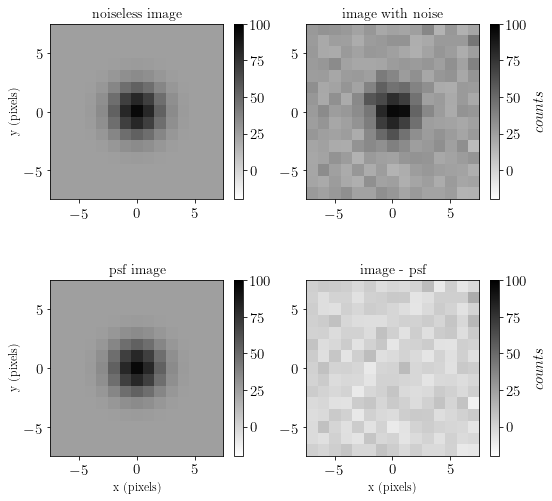

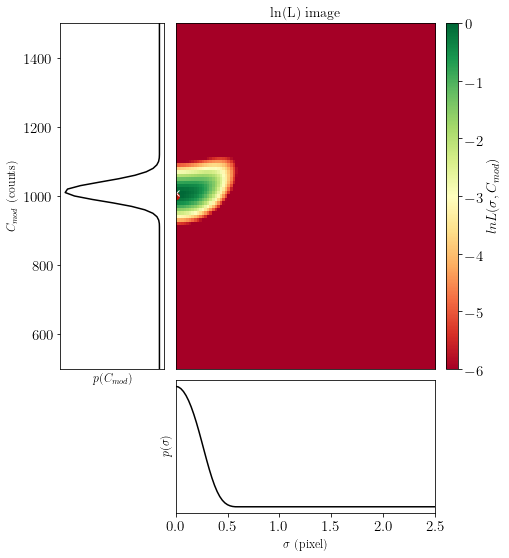

In [53]:
sigmaPSF = 1.5    # in pixels, corresponds to seeing = 1.5*0.2*2.355 = 0.7 arcsec for LSST (0.2" pix)
muXtrue = 0.0     # source x centroid 
muYtrue = 0.0     # source y centroid 
sigmaNoise = 5.0  # gaussian sigma for white noise (counts), e.g. due to sky 
sigtrue = 0.0     # the intrinsic gaussian source width, sigma (in pixels) 
Ctrue = 1000.0    # the source count normalization
skyBg = 25        # sky background

demo(muXtrue, muYtrue, sigtrue, Ctrue, skyBg, sigmaPSF, sigmaNoise);

the Maximum Likelihood point:
sigmaML =  0.9
 CmodML =  970.0
chi2DOF =  0.939255229631
Cmod from bestModel profile:  6617.82108974
Cpsf from the PSF profile:  6440.93837768


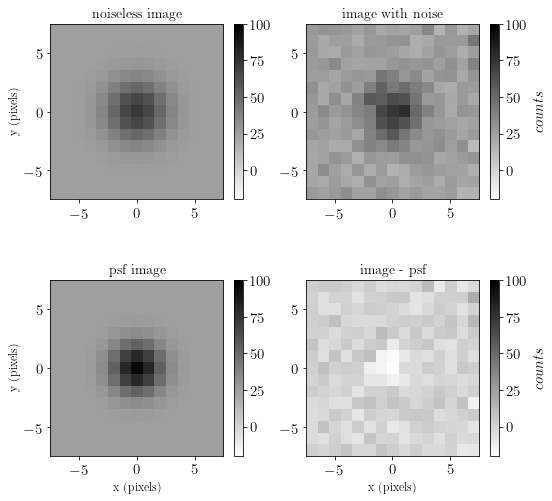

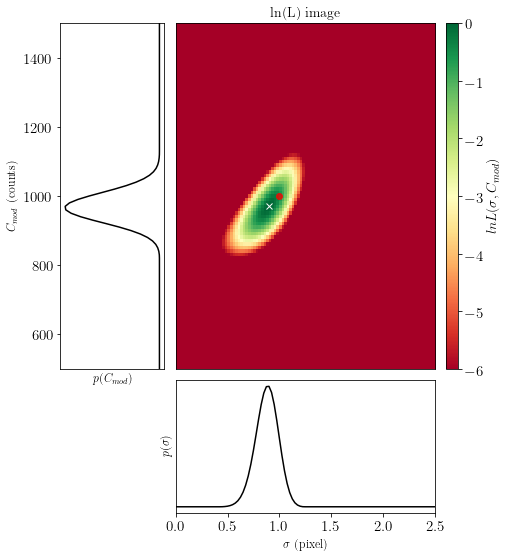

In [54]:
sigtrue = 1.0     # the intrinsic gaussian source width, sigma (in pixels) 
demo(muXtrue, muYtrue, sigtrue, Ctrue, skyBg, sigmaPSF, sigmaNoise);

## Summary

ML estimators are the standard workhorse for estimation of parameter values all across astronomy. Today we've seen how they can be used to perform stellar PSF photometry and shape measurement of objects. We've also learned a bit about image processing in astronomy.

Though the details may be more complicated, ***what you've seen today is very similar in spirit to what even the most sophisticated image processing codes do today***.

For more on this topic, read "Photon Rates and SNR Calculations" by Ivezic, Jones & Lupton (http://ls.st/lse-40; especially Section 4).

Next week we'll turn to similar problems in the Bayesian framework!